In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

Main Question: 
Why has the league batting average gone down significantly in the past 20 MLB seasons?

Sub-Questions: 
How has pitching advanced in the past 20 seasons?
Are pitchers allowing batters to walk more?
Is scoring becoming lower in games?
Are MLB teams prioritizing slugging over consistent batting?




In [2]:
BA = pd.read_csv('sportsref_download_BA.csv')
Pit = pd.read_csv('sportsref_download_Pitching.csv')


Data Cleaning for Pitching: Dropped any rows that were older than 20 years and dropped unnecessary columns that did not fully correrlate with pitching and batting.

In [3]:
Pit = Pit[Pit['Year'] >= 2004]
Pit.drop(['Tms', 'PAge', 'G', 'GF', 'CG', 'SHO', 'tSho', 'SV', 'IP', 'HBP', 'BK','WP','H9','HR9','BB9','SO9','SO/W'], axis=1, inplace=True)
BA = BA[BA['Year'] >= 2004]
BA.drop(['Tms', 'BatAge', 'G', 'CS', 'BB', 'SF', 'SH', 'HBP', 'GDP', 'TB'], axis=1, inplace=True)
BA

,Year,#Bat,R/G,PA,AB,R,H,1B,2B,3B,HR,RBI,SB,SO,BA,OBP,SLG,OPS,IBB,BIP
0,2024,741,4.39,37.56,33.69,4.39,8.20,5.34,1.60,0.14,1.12,4.19,0.74,8.48,0.243,0.312,0.399,0.711,0.10,24.35
1,2023,765,4.62,37.88,33.83,4.62,8.40,5.35,1.69,0.15,1.21,4.43,0.72,8.61,0.248,0.320,0.414,0.734,0.10,24.26
2,2022,790,4.28,37.46,33.63,4.28,8.16,5.33,1.63,0.13,1.07,4.09,0.51,8.40,0.243,0.312,0.395,0.706,0.10,24.41
3,2021,1373,4.53,37.43,33.33,4.53,8.13,5.15,1.62,0.14,1.22,4.32,0.46,8.68,0.244,0.317,0.411,0.728,0.14,23.67
4,2020,618,4.65,37.03,32.87,4.65,8.04,5.06,1.57,0.13,1.28,4.44,0.49,8.68,0.245,0.322,0.418,0.740,0.11,23.13
5,2019,1287,4.83,38.39,34.30,4.83,8.65,5.34,1.76,0.16,1.39,4.63,0.47,8.81,0.252,0.323,0.435,0.758,0.16,24.34
6,2018,1271,4.45,38.08,34.03,4.45,8.44,5.42,1.70,0.17,1.15,4.24,0.51,8.48,0.248,0.318,0.409,0.728,0.19,24.65
7,2017,1229,4.65,38.13,34.07,4.65,8.69,5.54,1.73,0.16,1.26,4.44,0.52,8.25,0.255,0.324,0.426,0.750,0.20,24.80
8,2016,1247,4.48,38.01,34.09,4.48,8.71,5.67,1.70,0.18,1.16,4.27,0.52,8.03,0.255,0.322,0.417,0.739,0.19,25.15
9,2015,1252,4.25,37.80,34.07,4.25,8.67,5.77,1.70,0.19,1.01,4.04,0.52,7.71,0.254,0.317,0.405,0.721,0.20,25.60


How has pitching advanced in the past 20 seasons?

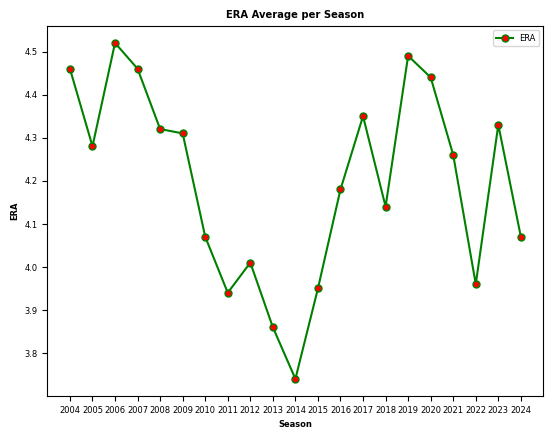

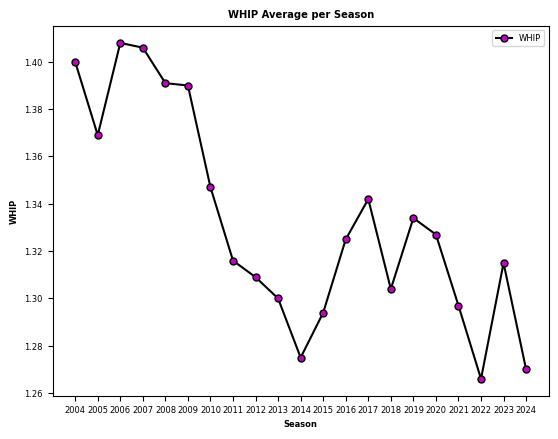

In [4]:
plt.style.use('default')
Pitching = Pit
plt.rcParams.update({'font.size': 6})
Pitching.plot.line(x='Year', y='ERA', c = 'g', marker = 'o', markerfacecolor = 'r', markersize = 5)

plt.title('ERA Average per Season', fontweight = 'bold')
plt.ylabel('ERA', fontweight = 'bold')
plt.xlabel('Season', fontweight = 'bold')
plt.xticks(np.arange(2004, 2025, 1)) 

plt.show()

Pitching.plot.line(y='WHIP', x='Year', color= 'black', marker = 'o', markerfacecolor = 'm', markersize = 5)
plt.title('WHIP Average per Season', fontweight = 'bold')
plt.ylabel('WHIP', fontweight = 'bold')
plt.xlabel('Season', fontweight = 'bold')
plt.xticks(np.arange(2004, 2025, 1)) 
plt.show()

Pitching has advanced a ton since 2004. The average velocity of a pitch in the MLB has increased from 89 mph to 94 mph. With this, batters have a much harder time hitting the ball. The evolution of pitching has spread throughout the world. Not only has velocity gone up in pitches, but the amount of quality pitchers has gone up. In the 2004 season, there were a total of 632 pitchers who had pitched a game, while in the 2024 season, 855 pitchers had pitched in a game. 

That means there are 1.35x more pitchers in the MLB in 2024 compared to 2004. As seen in the graphs above, this has helped pitchers throw max effort as they don't have to worry about pitching the whole games. ERA has dropped from 4.46 avg in 2004 compared to the 4.07 avg in 2024. Additionally, WHIP has dropped from 1.400 to 1.270. ERA (Earned runs allowed) and WHIP (walks plus hits per inning) are two of the most valuable stats in defining good pitching. The lower these two stats are the better. Overall, pitching has significantly improved since the 2004 season, making it harder for batters to hit the ball.

Are pitches allowing batters to walk more?

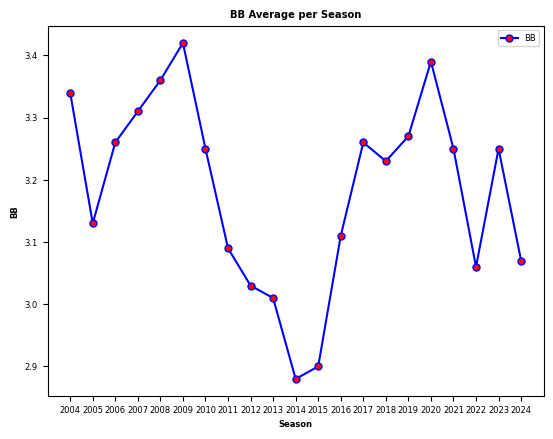

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind


#my philosophy on this question was to take the BB of each year and place them into a graph to compare them to each other
BA = pd.read_csv('sportsref_download_BA.csv')
Pit = pd.read_csv('sportsref_download_Pitching.csv')
Pit = Pit[Pit['Year'] >= 2004]
Pit.drop(['Tms', 'PAge', 'G', 'GF', 'CG', 'SHO', 'tSho', 'SV', 'IP', 'HBP', 'BK','WP','H9','HR9','BB9','SO9','SO/W'], axis=1, inplace=True)
BA = BA[BA['Year'] >= 2004]
BA.drop(['Tms', 'BatAge', 'G', 'CS', 'BB', 'SF', 'SH', 'HBP', 'GDP', 'TB'], axis=1, inplace=True)
BA

plt.style.use('default')
Pitching = Pit
plt.rcParams.update({'font.size': 6})
Pitching.plot.line(x='Year', y='BB', c = 'b', marker = 'o', markerfacecolor = 'r', markersize = 5)

plt.title('BB Average per Season', fontweight = 'bold')
plt.ylabel('BB', fontweight = 'bold')
plt.xlabel('Season', fontweight = 'bold')
plt.xticks(np.arange(2004, 2025, 1))

plt.show()

#Based on the graph I have generated, and the amount of walks being high near the edges of the graph compared to the center, pitchers were allowing players to walk a lot more from 2004 to 2010, with a dive in 2009. From 2011 to 2015, the BB was quite low, with a low of _ in 2014. However, in 2016, the BB began to spike, hitting 3.11, and since then the BB has been consistently above 3.

Has scoring become lower in games?

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

BA2 = pd.read_csv('sportsref_download_BA.csv')
Pit2 = pd.read_csv('sportsref_download_Pitching.csv')

# in order to look at the scores for each data set we have extract colums and merge them into one 
# this will help us look at one data set instead of looking them indivially 
batting_scores = BA2[['Year', 'R/G']].rename(columns={'R/G': 'Batting_R/G'})
pitching_scores = Pit2[['Year', 'R/G']].rename(columns={'R/G': 'Pitching_R/G'})
scores = pd.merge(batting_scores, pitching_scores, on='Year')
## error: i had help with this sectio and went to tutoring hours

# now that we have our merge data set we'll now have to compute the average run per game 
scores['Average_R/G'] = scores[['Batting_R/G', 'Pitching_R/G']].mean(axis=1)

#since there are many times period wtihin the data we have to divide them out i did >2000 and <2000
new_scores = scores[scores['Year'] >= 2000]['Average_R/G']
old_scores = scores[scores['Year'] < 2000]['Average_R/G']

#well then calculate the average run per game both for both the new and old era 

new_scores_avg = new_scores.mean()
old_scores_avg = old_scores.mean()
print( new_scores_avg)
print (old_scores_avg )


## error: i was still stuck in how to compute the t and p value of the score so i went to my friends for help since they are comptuer science major. 
## they gave me amazing tips to find the t and p values. 
t_stat, p_value = ttest_ind(new_scores, old_scores, equal_var=False)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")


4.557600000000001
4.785775193798449
T-statistic: -2.152
P-value: 0.033


The analysis of scoring trends over time reveals that the average runs per game have decreased from 4.78 in the pre-2000 era to 4.55 in the post-2000 era. This change was found to be statistically significant, as indicated by a p-value of 0.033 obtained through a t-test. These results suggest a notable shift in scoring trends between the two eras, with fewer runs being scored in the modern era.

Are MLB teams prioritizing slugging over consistant batting?

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BA = pd.read_csv('sportsref_download_BA.csv')
Pit = pd.read_csv('sportsref_download_Pitching.csv')

# Since we had to clean up our data set I'll go ahead and do the same of years greater than 2004
Pit = Pit[Pit['Year'] >= 2004]
BA = BA[BA['Year'] >= 2004]

# I'll do this by dropping some colums 
Pit.drop(['Tms', 'PAge', 'G', 'GF', 'CG', 'SHO', 'tSho', 'SV', 'IP', 'HBP', 'BK',
          'WP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W'], axis=1, inplace=True, errors='ignore')
BA.drop(['Tms', 'BatAge', 'G', 'CS', 'BB', 'SF', 'SH', 'HBP', 'GDP', 'TB'], axis=1, inplace=True, errors='ignore')
print("Columns in BA:")
print(BA.columns)

##error: i had alot of errors in this part as i kept going back and forth in the data set. I did have to ask my professor for help. 
available_columns = [col for col in ['Year', 'Team', 'BA', 'SLG', 'Wins'] if col in BA.columns]
batting_metrics = BA[available_columns]

print("Columns in batting_metrics:")
print(batting_metrics.columns)

# From here we can find the average in the date set.
average_metrics = batting_metrics.groupby('Year').mean()[['BA', 'SLG']]
print("\nAverage Metrics:")
print(average_metrics)
print("Required columns for analysis are missing.")


Columns in BA:
Index(['Year', '#Bat', 'R/G', 'PA', 'AB', 'R', 'H', '1B', '2B', '3B', 'HR',
       'RBI', 'SB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'IBB', 'BIP'],
      dtype='object')
Columns in batting_metrics:
Index(['Year', 'BA', 'SLG'], dtype='object')

Average Metrics:
         BA    SLG
Year              
2004  0.266  0.428
2005  0.264  0.419
2006  0.269  0.432
2007  0.268  0.423
2008  0.264  0.416
2009  0.262  0.418
2010  0.257  0.403
2011  0.255  0.399
2012  0.255  0.405
2013  0.253  0.396
2014  0.251  0.386
2015  0.254  0.405
2016  0.255  0.417
2017  0.255  0.426
2018  0.248  0.409
2019  0.252  0.435
2020  0.245  0.418
2021  0.244  0.411
2022  0.243  0.395
2023  0.248  0.414
2024  0.243  0.399
Required columns for analysis are missing.


MLB teams appear to prioritize slugging over consistent batting. While batting average (BA) has slightly declined from 2004 to 2024, slugging percentage (SLG) has remained more stable and higher. This suggests that teams value power hitting (extra-base hits) more than maintaining a high BA.

Conclusion: The data that we covered helped us in identifying key factors behind the significant decline in league batting average over the past 20 MLB seasons. The findings highlight how evolving pitching techniques, defensive strategies, and changes in offensive approaches have collectively contributed to this trend. ​
